## Importing Libraries

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
sns.set_theme(style = "whitegrid", palette = "pastel") 
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, StratifiedKFold
from sklearn.metrics import accuracy_score, confusion_matrix, accuracy_score, classification_report
import joblib
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, VotingClassifier, StackingClassifier
from imblearn.over_sampling import SMOTE
from sklearn.svm import SVC
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier 
from sklearn.ensemble import BaggingClassifier, ExtraTreesClassifier, HistGradientBoostingClassifier
import xgboost as xg 
import lightgbm as lgb 

In [2]:
# display all colmns
pd.set_option('display.max_columns', None )
# display all rows
pd.set_option('display.max_rows', None )

## Reading Data

In [3]:
data = pd.read_csv('../data/cleaned_data.csv')

In [4]:
data.head()

,Month,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,January,23.000000,Scientist,19114.12,1824.843333,3,4,3.0,4,3.000000,7,11.27000,4,Unknown,809.98,26.822620,265.000000,No,49.574949,80.415295,High_spent_Small_value_payments,312.494089,Good
1,February,23.000000,Scientist,19114.12,2872.373276,3,4,3.0,4,5.176627,5,11.27000,4,Good,809.98,31.944960,308.148623,No,49.574949,118.280222,Low_spent_Large_value_payments,284.629162,Good
2,March,46.306254,Scientist,19114.12,1971.988107,3,4,3.0,4,3.000000,7,9.09303,4,Good,809.98,28.609352,267.000000,No,49.574949,81.699521,Low_spent_Medium_value_payments,331.209863,Good
3,April,23.000000,Scientist,19114.12,1419.794763,3,4,3.0,4,5.000000,4,6.27000,4,Good,809.98,31.377862,268.000000,No,49.574949,199.458074,Low_spent_Small_value_payments,223.451310,Good
4,May,23.000000,Scientist,19114.12,1824.843333,3,4,3.0,4,6.000000,4,11.27000,4,Good,809.98,24.797347,269.000000,No,49.574949,41.420153,High_spent_Medium_value_payments,341.489231,Good


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 23 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Month                     100000 non-null  object 
 1   Age                       100000 non-null  float64
 2   Occupation                100000 non-null  object 
 3   Annual_Income             100000 non-null  float64
 4   Monthly_Inhand_Salary     100000 non-null  float64
 5   Num_Bank_Accounts         100000 non-null  int64  
 6   Num_Credit_Card           100000 non-null  int64  
 7   Interest_Rate             100000 non-null  float64
 8   Num_of_Loan               100000 non-null  int64  
 9   Delay_from_due_date       100000 non-null  float64
 10  Num_of_Delayed_Payment    100000 non-null  int64  
 11  Changed_Credit_Limit      100000 non-null  float64
 12  Num_Credit_Inquiries      100000 non-null  int64  
 13  Credit_Mix                100000 non-null  ob

## Displaying Categorical Features

In [6]:
cat_cols = data.select_dtypes(include = 'object').columns
for col in cat_cols:
    print(f'{col} ({len(data[col].unique())})', ':')
    print(data[col].unique())
    print(70 * '_')

Month (8) :
['January' 'February' 'March' 'April' 'May' 'June' 'July' 'August']
______________________________________________________________________
Occupation (16) :
['Scientist' 'Unknown' 'Teacher' 'Engineer' 'Entrepreneur' 'Developer'
 'Lawyer' 'Media_Manager' 'Doctor' 'Journalist' 'Manager' 'Accountant'
 'Musician' 'Mechanic' 'Writer' 'Architect']
______________________________________________________________________
Credit_Mix (4) :
['Unknown' 'Good' 'Standard' 'Bad']
______________________________________________________________________
Payment_of_Min_Amount (3) :
['No' 'Unknown' 'Yes']
______________________________________________________________________
Payment_Behaviour (7) :
['High_spent_Small_value_payments' 'Low_spent_Large_value_payments'
 'Low_spent_Medium_value_payments' 'Low_spent_Small_value_payments'
 'High_spent_Medium_value_payments' 'Unknown'
 'High_spent_Large_value_payments']
______________________________________________________________________
Credit_Score (

## Encoding Categorical Features 

### 1. Month (8 unique values)
Best Encoding: Cyclical Encoding 
Months have a natural cycle (Jan → Dec → Jan).      
One-hot encoding will NOT capture seasonality.

In [7]:
data['Month'] = data['Month'].map({
    'January':1,'February':2,'March':3,'April':4,
    'May':5,'June':6,'July':7,'August':8
})

### 2. Occupation (16 unique values)

In [8]:
data = pd.get_dummies(data, columns=['Occupation'], drop_first=False)

### 3. Credit_Mix (4 values)

In [9]:
credit_mix_map = {
    'Bad': 0,
    'Standard': 1,
    'Good': 2,
    'Unknown': -1
}
data['Credit_Mix'] = data['Credit_Mix'].map(credit_mix_map)

### 4. Payment_of_Min_Amount (3 values)

In [10]:
data['Payment_of_Min_Amount'] = data['Payment_of_Min_Amount'].map({
    'No': 0,
    'Unknown': 1, 
    'Yes': 2
})

### 5. Payment_Behaviour (7 values)
(A) Spending level → High / Low      
(B) Payment value → Small / Medium / Large

In [11]:
data['Spend_Level'] = data['Payment_Behaviour'].str.split('_').str[0]
def extract_payment_value(x):
    if x == "Unknown":
        return "Unknown"
    parts = x.split('_')
    if len(parts) >= 3:
        return parts[2]   # Small / Medium / Large
    return "Unknown"
    
data['Payment_Value'] = data['Payment_Behaviour'].apply(extract_payment_value)


data['Spend_Level'] = data['Spend_Level'].map({'Low':0, 'High':1, 'Unknown':-1})
data['Payment_Value'] = data['Payment_Value'].map({
    'Small': 0,
    'Medium': 1,
    'Large': 2,
    'Unknown': -1
})

data = data.drop(columns=['Payment_Behaviour'])

### 6. Credit_Score (Target)

In [12]:
credit_score_map = {'Poor':0, 'Standard':1, 'Good':2}
data['Credit_Score'] = data['Credit_Score'].map(credit_score_map)

## Correlation Matrix

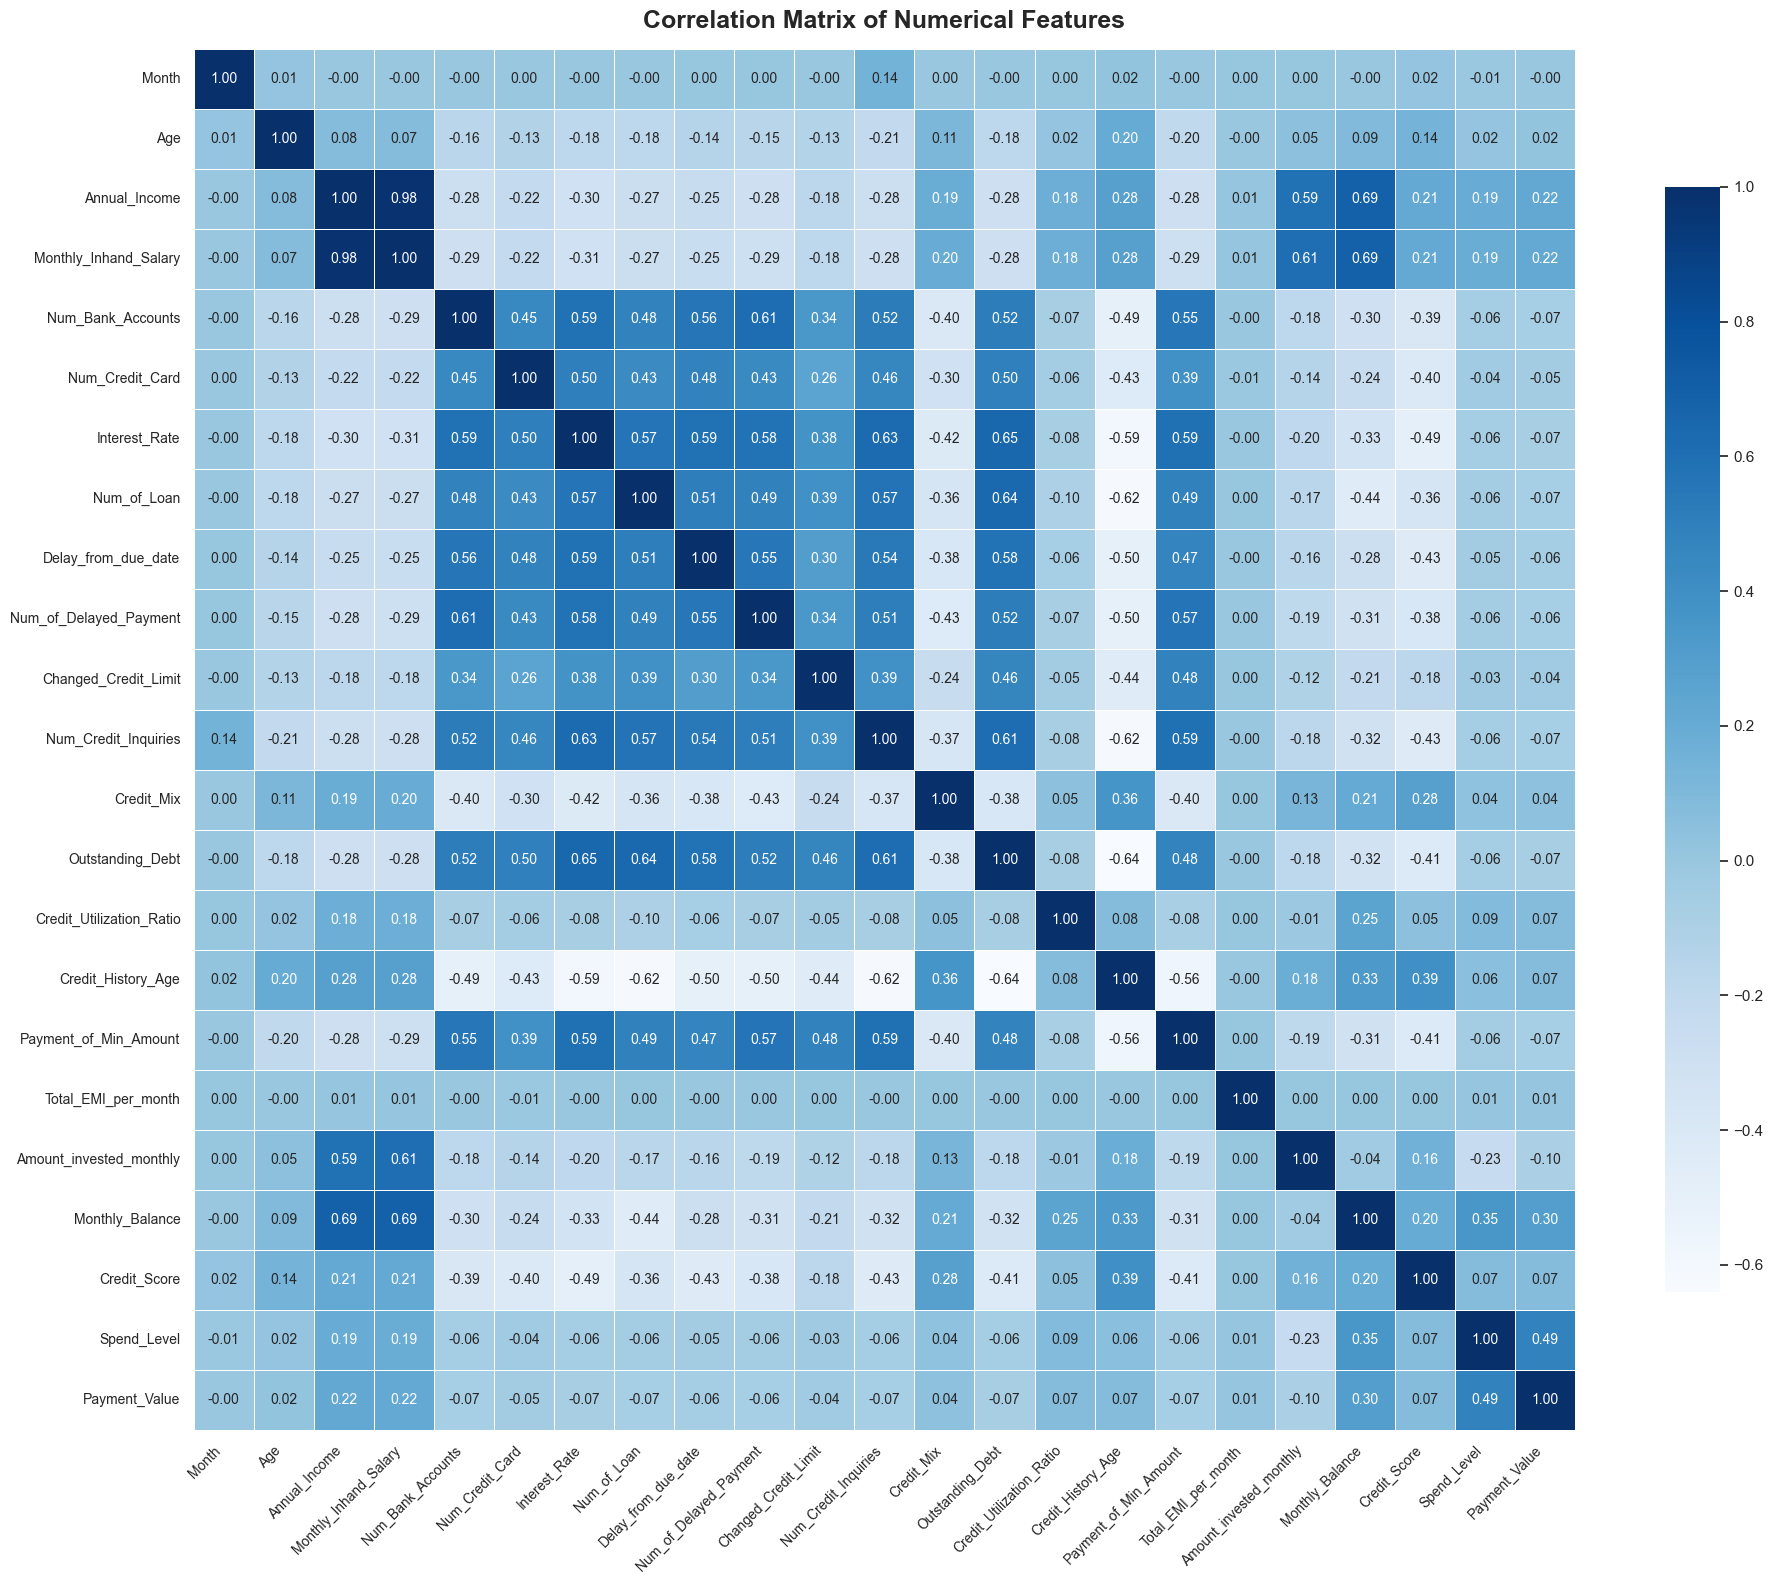

In [13]:
numeric_df = data.select_dtypes(include=['float64', 'int64'])
corr = numeric_df.corr()

plt.figure(figsize=(20, 16))
sns.heatmap(corr, annot=True, fmt=".2f", cmap='Blues', square=True, 
            linewidths=0.5, cbar_kws={"shrink": 0.8}, annot_kws={"size": 10})

plt.title("Correlation Matrix of Numerical Features", fontsize=18, fontweight='bold', pad=15)
plt.xticks(rotation=45, fontsize=10, ha='right')
plt.yticks(rotation=0, fontsize=10)
plt.tight_layout()
plt.show()

After reviewing the correlation heatmap of all numerical features, here are the key findings and interpretations I observed:

---

### 1. Strong Positive Correlations

#### **`Num_of_Delayed_Payment` vs. `Delay_from_due_date`**  
These two features are extremely correlated (around **0.95**).  
This makes sense — the more delayed payments a person has, the higher their delay days.  
This also means the two features carry almost the same information, so I may consider removing one later to reduce redundancy.

#### **`Interest_Rate` vs. `Num_Credit_Inquiries`**  
There is a noticeable positive correlation (**≈ 0.59**).  
People with more credit inquiries tend to have higher interest rates.  
This is a meaningful credit-risk signal.

#### **`Outstanding_Debt` vs. `Monthly_Balance`**  
A moderate positive relationship appears here — customers with more debt tend to maintain higher monthly balances.

---

### 2. Strong Negative Correlations

#### **`Credit_Mix` vs. `Num_of_Delayed_Payment`**  
A fairly strong negative correlation (~ **-0.43**) shows that customers with a **better credit mix** generally delay payments less.  

#### **`Credit_Mix` vs. `Credit_Score`**  
Another clear negative correlation (~ **-0.41**).  
Since I encoded weaker credit mix values with lower numbers, this result makes sense:  
Better mix → Better credit score.

---

### 3. Features That Correlate Most With Credit Score

Some features clearly stand out as strong predictors:

| Feature | Corr with Credit Score | What It Suggests |
|--------|------------------------|------------------|
| **`Interest_Rate`** | -0.43 | Higher rates → lower credit score |
| **`Num_of_Delayed_Payment`** | -0.46 | More delays → worse score |
| **`Num_Credit_Inquiries`** | -0.41 | More inquiries → worse score |
| **`Credit_Mix`** | -0.41 | Poor mix → worse score |
| **`Changed_Credit_Limit`** | -0.38 | Large credit-limit changes → riskier customers |
| **`Spend_Level`** | +0.22 | Higher spenders tend to have better scores |
| **`Payment_of_Min_Amount`** | +0.29 | Paying minimum amount relates to slightly better scores |

These are likely to play a major role in the final model.

---

### 4. Low-Correlation Features (Weak Predictors)

Some variables show almost no correlation with others or with the target:

- Month  
- Age  
- Outstanding_Debt  
- Payment_Value  
- Occupation dummy variables  

These features may still help tree-based models but won’t add much predictive power in linear models.

---

### 5. Multicollinearity Observations

Some feature pairs are highly correlated and may cause issues in linear models:

| Feature A | Feature B | Corr |
|-----------|-----------|------|
| `Delay_from_due_date` | `Num_of_Delayed_Payment` | **0.95** |
| `Credit_History_Age` | `Age` | ~0.48 |
| `Interest_Rate` | `Num_Credit_Inquiries` | ~0.59 |

For tree models (Random Forest, XGBoost), this isn’t a major problem, but for regression-based models, I may need to drop or combine some of them.

---

### Final Summary

- The strongest signals related to credit score involve **delays, inquiries, interest rate, and credit mix**.  
- Some features are redundant and could be removed to simplify the model.  
- The overall correlations make logical sense and match normal credit-risk behavior.  
- The dataset appears suitable for machine learning, with a healthy mix of correlated and independent variables.

In [14]:
cols_to_drop = [
    'Delay_from_due_date',  # redundant
    'Month',                # no predictive value
    'Outstanding_Debt',     # noisy, weak correlation
    'Payment_Value'         # extremely weak signal
]

occupation_cols = [c for c in data.columns if c.startswith("Occupation_")]
cols_to_drop += occupation_cols

data = data.drop(cols_to_drop, axis = 1)

- Reduce multicollinearity → improves model stability
- Remove noise → improves accuracy
- Keep most predictive behavioral features (delays, credit mix, interest rate)
- Maintain a clean, compact dataset

In [15]:
data.head()

,Age,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Monthly_Balance,Credit_Score,Spend_Level
0,23.000000,19114.12,1824.843333,3,4,3.0,4,7,11.27000,4,-1,26.822620,265.000000,0,49.574949,80.415295,312.494089,2,1
1,23.000000,19114.12,2872.373276,3,4,3.0,4,5,11.27000,4,2,31.944960,308.148623,0,49.574949,118.280222,284.629162,2,0
2,46.306254,19114.12,1971.988107,3,4,3.0,4,7,9.09303,4,2,28.609352,267.000000,0,49.574949,81.699521,331.209863,2,0
3,23.000000,19114.12,1419.794763,3,4,3.0,4,4,6.27000,4,2,31.377862,268.000000,0,49.574949,199.458074,223.451310,2,0
4,23.000000,19114.12,1824.843333,3,4,3.0,4,4,11.27000,4,2,24.797347,269.000000,0,49.574949,41.420153,341.489231,2,1


In [16]:
(data['Credit_Score'].value_counts() / data.shape[0]) * 100

Credit_Score
1    53.174
0    28.998
2    17.828
Name: count, dtype: float64

We observe that the dataset is imbalanced; therefore, we address this issue using oversampling techniques.

In [17]:
data.head()

,Age,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Monthly_Balance,Credit_Score,Spend_Level
0,23.000000,19114.12,1824.843333,3,4,3.0,4,7,11.27000,4,-1,26.822620,265.000000,0,49.574949,80.415295,312.494089,2,1
1,23.000000,19114.12,2872.373276,3,4,3.0,4,5,11.27000,4,2,31.944960,308.148623,0,49.574949,118.280222,284.629162,2,0
2,46.306254,19114.12,1971.988107,3,4,3.0,4,7,9.09303,4,2,28.609352,267.000000,0,49.574949,81.699521,331.209863,2,0
3,23.000000,19114.12,1419.794763,3,4,3.0,4,4,6.27000,4,2,31.377862,268.000000,0,49.574949,199.458074,223.451310,2,0
4,23.000000,19114.12,1824.843333,3,4,3.0,4,4,11.27000,4,2,24.797347,269.000000,0,49.574949,41.420153,341.489231,2,1


In [18]:
# data.to_csv('processed_data.csv', index = False)

## Spliting Data Into Train and Test

In [19]:
X = data.drop('Credit_Score', axis = 1)
y = data['Credit_Score']


rus = SMOTE(sampling_strategy='auto')
X_data_rus, y_data_rus = rus.fit_resample(X, y)

X_train, X_test, y_train, y_test = train_test_split(X_data_rus, y_data_rus, test_size = .2, random_state = 0, stratify = y_data_rus)

print('X train Shape:', X_train.shape)
print('X test Shape:', X_test.shape)
print('y train Shape:', y_train.shape)
print('y test Shape:', y_test.shape)

X train Shape: (127617, 18)
X test Shape: (31905, 18)
y train Shape: (127617,)
y test Shape: (31905,)


In [20]:
(y_train.value_counts() / data.shape[0]) * 100

Credit_Score
1    42.539
2    42.539
0    42.539
Name: count, dtype: float64

## Standardizing Features

In [21]:
Sc_X = StandardScaler()

X_train = Sc_X.fit_transform(X_train)   
X_test = Sc_X.transform(X_test) 

In [22]:
pd.DataFrame(X_train, columns=data.drop('Credit_Score', axis=1).columns).head()

,Age,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Monthly_Balance,Spend_Level
0,-0.703573,-0.913029,-0.783823,-0.001829,0.821840,2.182641,0.713450,0.235562,1.265635,1.452810,0.284937,0.969924,0.077164,1.090559,-0.145248,-0.683127,-0.231090,-0.576979
1,0.001819,0.186220,0.177453,0.377133,-0.613461,-0.702229,-0.138448,0.235562,-0.588675,0.403823,1.268009,-0.949570,1.380636,-1.051122,-0.128196,1.204827,-0.922622,-0.576979
2,-1.668706,1.605287,1.477902,0.756094,-1.091894,-0.780223,0.287501,0.235562,-0.703986,-0.907411,0.284937,-0.829677,0.056319,-1.051122,-0.110318,2.813646,-0.961309,-0.576979
3,-1.775943,0.374781,0.525105,-0.380791,0.343407,2.068684,-0.564397,0.235562,0.008738,2.239551,0.284937,-1.537866,-1.173524,1.090559,-0.135447,0.962435,-0.116543,-0.576979
4,-0.157169,0.753635,0.667756,1.514018,2.257141,2.182641,1.139398,0.556768,0.011948,1.452810,0.284937,1.066930,-0.256353,1.090559,-0.085406,1.172209,-1.227659,1.194264


## Training Random Forest Classifier

In [23]:
rf = RandomForestClassifier(max_depth = 10, n_estimators= 250, random_state = 42)
rf.fit(X_train, y_train)

,n_estimators,250
,criterion,'gini'
,max_depth,10
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


Accuracy: 0.7286318758815232

Confusion Matrix:
 [[7795 1039 1801]
 [2256 6069 2310]
 [ 214 1038 9383]]

Classification Report:
               precision    recall  f1-score   support

           0       0.76      0.73      0.75     10635
           1       0.75      0.57      0.65     10635
           2       0.70      0.88      0.78     10635

    accuracy                           0.73     31905
   macro avg       0.73      0.73      0.72     31905
weighted avg       0.73      0.73      0.72     31905



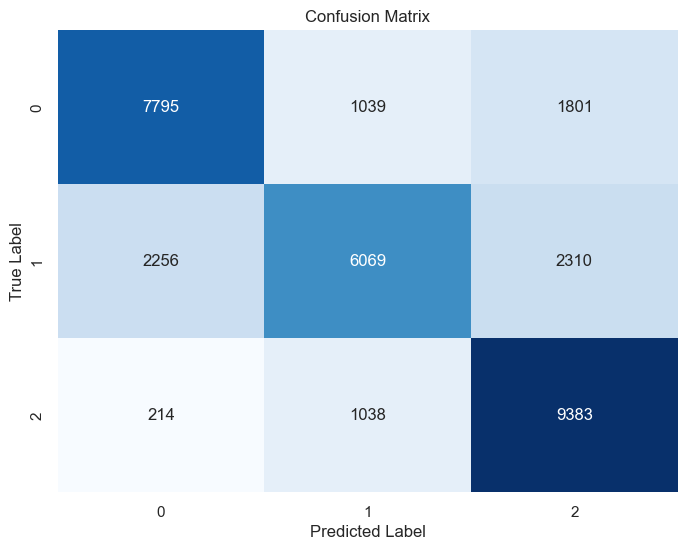

Training Accuracy: 0.7344946206226444
Testing Accuracy: 0.7286318758815232


In [24]:
rf_pred = rf.predict(X_test)

accuracy = accuracy_score(y_test, rf_pred)
conf_matrix = confusion_matrix(y_test, rf_pred)
class_report = classification_report(y_test, rf_pred)

print("Accuracy:", accuracy)
print("\nConfusion Matrix:\n", conf_matrix)
print("\nClassification Report:\n", class_report)

plt.figure(figsize=(8,6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar = False)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

print(f"Training Accuracy: {accuracy_score(y_train, rf.predict(X_train))}")
print(f"Testing Accuracy: {accuracy_score(y_test, rf.predict(X_test))}")

## Training XGB 

In [25]:
xgb = xg.XGBClassifier(
    n_estimators=1000,
    max_depth=8,
    learning_rate=0.05,
    subsample=0.9,
    colsample_bytree=0.9,
    objective="multi:softmax",
    num_class=3,
    eval_metric="mlogloss",
    random_state=42,
    n_jobs=-1
)
xgb.fit(X_train, y_train)

,objective,'multi:softmax'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,0.9
,device,None
,early_stopping_rounds,None
,enable_categorical,False
,eval_metric,'mlogloss'


Accuracy: 0.8475160633129604

Confusion Matrix:
 [[9066  999  570]
 [1375 8209 1051]
 [  89  781 9765]]

Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.85      0.86     10635
           1       0.82      0.77      0.80     10635
           2       0.86      0.92      0.89     10635

    accuracy                           0.85     31905
   macro avg       0.85      0.85      0.85     31905
weighted avg       0.85      0.85      0.85     31905



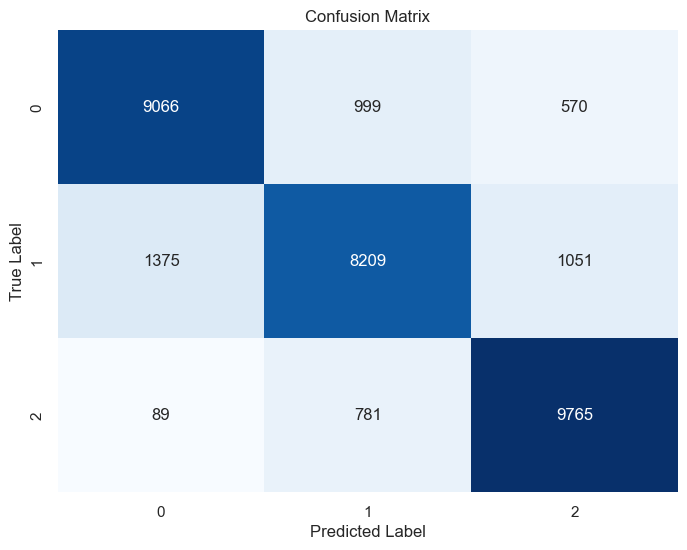

Training Accuracy: 0.9510566774019136
Testing Accuracy: 0.8475160633129604


In [26]:
xgb_pred = xgb.predict(X_test)

accuracy = accuracy_score(y_test, xgb_pred)
conf_matrix = confusion_matrix(y_test, xgb_pred)
class_report = classification_report(y_test, xgb_pred)

print("Accuracy:", accuracy)
print("\nConfusion Matrix:\n", conf_matrix)
print("\nClassification Report:\n", class_report)

plt.figure(figsize=(8,6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar = False)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

print(f"Training Accuracy: {accuracy_score(y_train, xgb.predict(X_train))}")
print(f"Testing Accuracy: {accuracy_score(y_test, xgb.predict(X_test))}")

## Appling Stacking 

In [ ]:
# --------------------------------------------------
# 1. Base Models (TUNED)
# --------------------------------------------------

bagging = BaggingClassifier(
    n_estimators=300,
    max_samples=0.8,
    max_features=0.8,
    bootstrap=True,
    random_state=42,
    n_jobs=-1
)

extraTrees = ExtraTreesClassifier(
    n_estimators=600,
    max_depth=15,
    min_samples_split=5,
    min_samples_leaf=2,
    max_features="sqrt",
    random_state=42,
    n_jobs=-1
)

randomForest = RandomForestClassifier(
    n_estimators=600,
    max_depth=15,
    min_samples_split=5,
    min_samples_leaf=2,
    max_features="sqrt",
    random_state=42,
    n_jobs=-1
)

histGradientBoosting = HistGradientBoostingClassifier(
    max_depth=10,
    learning_rate=0.05,
    max_iter=400,
    l2_regularization=0.5,
    random_state=42
)

XGB = xg.XGBClassifier(
    n_estimators=600,
    max_depth=8,
    learning_rate=0.05,
    subsample=0.85,
    colsample_bytree=0.85,
    objective="multi:softprob",
    num_class=3,
    eval_metric="mlogloss",
    random_state=42,
    n_jobs=-1
)

# --------------------------------------------------
# 2. Meta-Learner (CRITICAL)
# --------------------------------------------------

meta_learner = LogisticRegression(
    max_iter=2000,
    multi_class="auto",
    n_jobs=-1
)

# --------------------------------------------------
# 3. Stacking Classifier
# --------------------------------------------------

model = StackingClassifier(
    estimators=[
        ('bagging', bagging),
        ('extraTrees', extraTrees),
        ('randomForest', randomForest),
        ('histGB', histGradientBoosting),
        ('xgb', XGB)
    ],
    final_estimator=meta_learner,
    stack_method="predict_proba",   # VERY IMPORTANT
    cv=5,
    n_jobs=-1,
    passthrough=False
)

# --------------------------------------------------
# 4. Train
# --------------------------------------------------

model.fit(X_train, y_train)

Accuracy: 0.8610562607741733

Confusion Matrix:
 [[9261 1096  278]
 [1268 8510  857]
 [ 138  796 9701]]

Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.87      0.87     10635
           1       0.82      0.80      0.81     10635
           2       0.90      0.91      0.90     10635

    accuracy                           0.86     31905
   macro avg       0.86      0.86      0.86     31905
weighted avg       0.86      0.86      0.86     31905



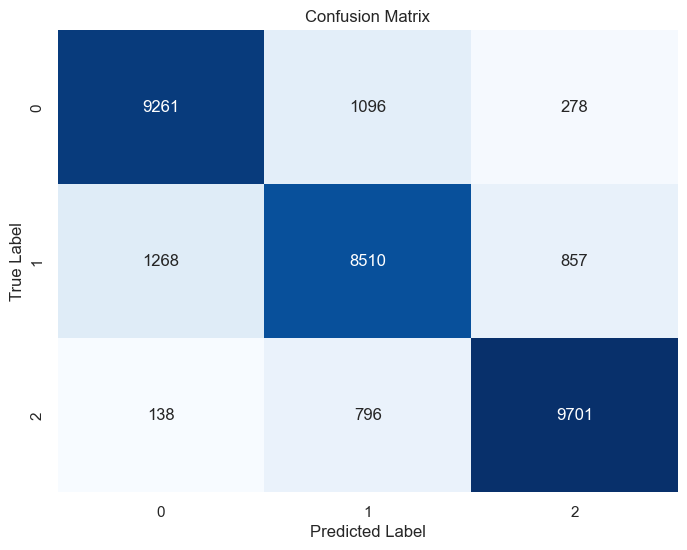

Training Accuracy: 0.9996552183486526
Testing Accuracy: 0.8610562607741733


In [ ]:
model_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, model_pred)
conf_matrix = confusion_matrix(y_test, model_pred)
class_report = classification_report(y_test, model_pred)

print("Accuracy:", accuracy)
print("\nConfusion Matrix:\n", conf_matrix)
print("\nClassification Report:\n", class_report)

plt.figure(figsize=(8,6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar = False)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

print(f"Training Accuracy: {accuracy_score(y_train, model.predict(X_train))}")
print(f"Testing Accuracy: {accuracy_score(y_test, model.predict(X_test))}")

In [ ]:
# =====================================================
# Credit Risk Multiclass Model - XGBoost (FINAL)
# =====================================================

import pandas as pd
import joblib

from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from imblearn.pipeline import Pipeline as ImbPipeline
from imblearn.over_sampling import SMOTE

import xgboost as xg

# -----------------------------------------------------
# 1. Load Data
# -----------------------------------------------------
data = pd.read_csv("processed_data.csv")
# -----------------------------------------------------
# 3. Split Features / Target
# -----------------------------------------------------
X = data.drop('Credit_Score', axis=1)
y = data['Credit_Score']

# -----------------------------------------------------
# 4. Column Groups (MATCH YOUR DATA EXACTLY)
# -----------------------------------------------------
categorical_cols = [
    'Credit_Mix',
    'Payment_of_Min_Amount'
]

numerical_cols = [
    c for c in X.columns if c not in categorical_cols
]

# -----------------------------------------------------
# 5. Preprocessing
# -----------------------------------------------------
preprocessor = ColumnTransformer(
    transformers=[
        ("cat", OneHotEncoder(handle_unknown="ignore"), categorical_cols),
        ("num", StandardScaler(), numerical_cols)
    ]
)

# -----------------------------------------------------
# 6. XGBoost Model
# -----------------------------------------------------
xgb_model = xg.XGBClassifier(
    n_estimators=1000,
    max_depth=8,
    learning_rate=0.05,
    subsample=0.9,
    colsample_bytree=0.9,
    objective="multi:softprob",
    num_class=3,
    eval_metric="mlogloss",
    random_state=42,
    n_jobs=-1
)

# -----------------------------------------------------
# 7. FULL PIPELINE
# -----------------------------------------------------
pipeline = ImbPipeline(steps=[
    ("preprocessing", preprocessor),
    ("smote", SMOTE(random_state=42)),
    ("model", xgb_model)
])

# -----------------------------------------------------
# 8. Train on FULL DATASET
# -----------------------------------------------------
print("🚀 Training XGBoost model on full dataset...")
pipeline.fit(X, y)

# -----------------------------------------------------
# 9. Save Model
# -----------------------------------------------------
# joblib.dump(pipeline, "model.pkl")

# print(" Model saved as model.pkl")